In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
import itertools
from csv import writer

In [2]:
#Импорт тренировочного и тестового датасета
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [3]:
X_train = train.drop('Transported', axis=1)           #признаки тренировочного датасета
y_train = train['Transported']                        #ответы тренировочного датасета
X_test = test.copy()   #признаки тестового дата сета
y_test = pd.read_csv('sample_submission1.csv')['Transported']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6923, 12), (6923,), (3438, 12), (3438,))

Train
Accuracy: 100 % 



<Axes: >

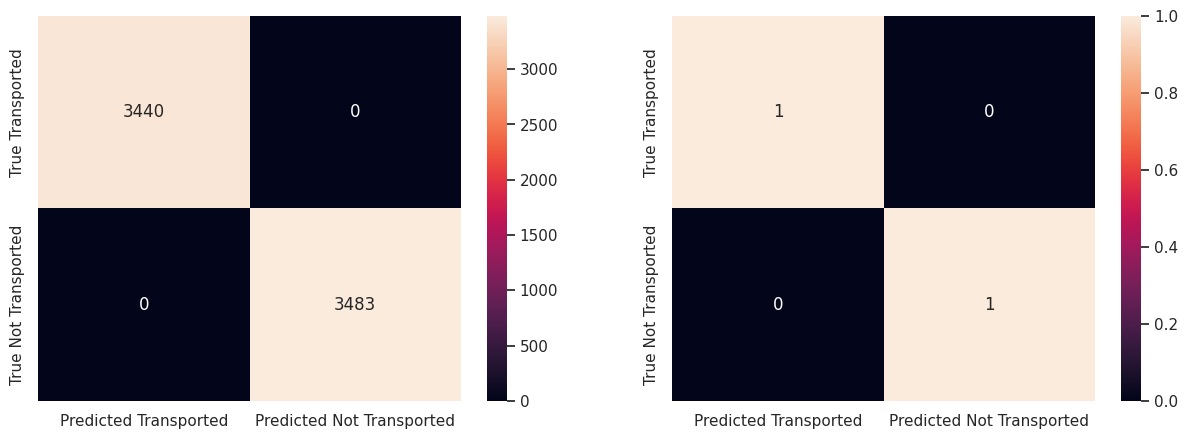

In [4]:
print('Train')
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_train = clf.predict(X_train)
acc_decision_tree1 = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_decision_tree1)

class_names = ['Transported', 'Not Transported']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_decision_train)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Transported', 'True Not Transported']
predicted_class_names = ['Predicted Transported', 'Predicted Not Transported']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

Test
Accuracy: 47 % 



/tmp/ipykernel_29106/2543754165.py:13: RuntimeWarning: invalid value encountered in divide
  cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


<Axes: >

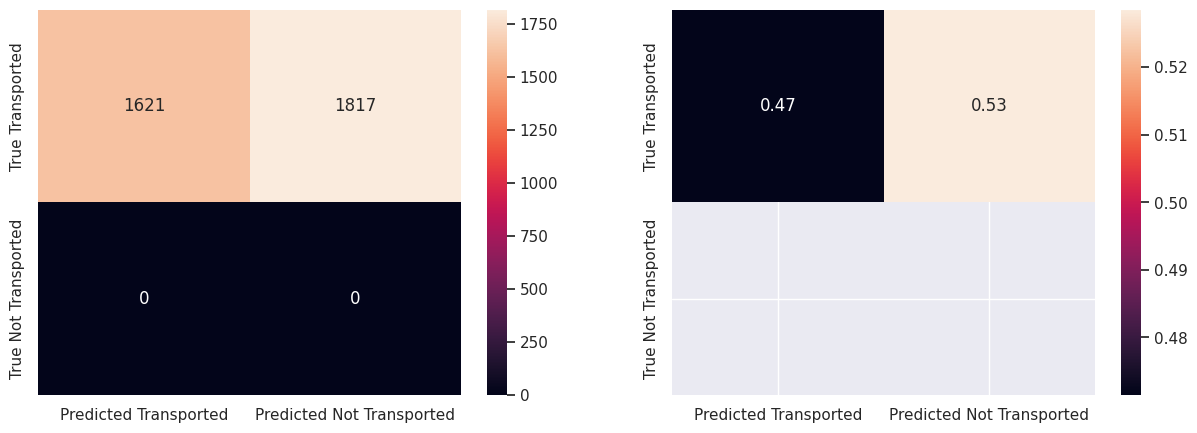

In [5]:
print('Test')
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_test = clf.predict(X_test)
acc_decision_tree2 = round(clf.score(X_test, y_test) * 100, 2)
print ("Accuracy: %i %% \n"%acc_decision_tree2)

class_names = ['Transported', 'Not Transported']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_decision_test)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Transported', 'True Not Transported']
predicted_class_names = ['Predicted Transported', 'Predicted Not Transported']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)



In [6]:
file = open('models.csv','a')
df = pd.DataFrame({'model': ['Decision Tree'], 'train': [acc_decision_tree1], 'test': [acc_decision_tree2]})
df.to_csv('models.csv', mode='a', index= False , header= False )
file.close()